In [1]:
#CSC478 Homework 1
#Becky (Rebecca) Jacob

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

In [3]:
bank_ = pd.read_csv('bank_data.csv', sep=',')
bank_.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [4]:
'''1. Explore the general characteristics of the data as a whole: 
examine the means, standard deviations, and other statistics associated 
with the numerical attributes; show the distributions of values associated with categorical attributes; etc.'''

'1. Explore the general characteristics of the data as a whole: \nexamine the means, standard deviations, and other statistics associated \nwith the numerical attributes; show the distributions of values associated with categorical attributes; etc.'

In [5]:
bank_.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [6]:
cont = ['age','income','children']
disc = ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep']

In [7]:
bank_[cont].describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [8]:
bank_[disc].describe()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


In [9]:
'''2. Suppose that because of the bank is particularly interested in customers who buy the PEP product. 
Compare and contrast the subsets of customers who buy and don't buy the PEP. 
Compute summaries (as in part 1) of the selected data with respect to all other attributes. 
Can you observe any significant differences between these segments of customers? Discuss your observations.'''

"2. Suppose that because of the bank is particularly interested in customers who buy the PEP product. \nCompare and contrast the subsets of customers who buy and don't buy the PEP. \nCompute summaries (as in part 1) of the selected data with respect to all other attributes. \nCan you observe any significant differences between these segments of customers? Discuss your observations."

In [10]:
bank_pep = (bank_.pep == 'YES')
bank_nopep = (bank_.pep == 'NO')
bank_P = bank_[bank_pep]
bank_noP = bank_[bank_nopep]

In [11]:
bank_noP[cont].describe()

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


In [12]:
bank_P[cont].describe()

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [13]:
bank_noP[disc].describe()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,326,326,326,326,326,326,326,326
unique,2,4,2,2,2,2,2,1
top,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,170,146,242,168,235,244,209,326


In [14]:
bank_P[disc].describe()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,274,274,274,274,274,274,274,274
unique,2,4,2,2,2,2,2,1
top,MALE,INNER_CITY,YES,YES,YES,YES,NO,YES
freq,144,123,154,138,179,211,182,274


In [15]:
'''
Right away we see that slightly more (326) records do not have pep, than those who do (274).
First I looked at the difference in continuous features between those records w/pep and those without.
We can see that those w/out pep are slightly younger, have less money, and have a larger standard deviation when it comes to children.
Next, I looked at the difference in discrete features. 
The two subsets are similar for: region, married, savings_acct, current_acct and mortgage.
The features that differ are: gender, with female being slightly more common for no pep records, versus male for records w/pep.
They also differ on having a car or not - w/pep records tend to have cars, while no pep records tend not to. 
'''

'\nRight away we see that slightly more (326) records do not have pep, than those who do (274).\nFirst I looked at the difference in continuous features between those records w/pep and those without.\nWe can see that those w/out pep are slightly younger, have less money, and have a larger standard deviation when it comes to children.\nNext, I looked at the difference in discrete features. \nThe two subsets are similar for: region, married, savings_acct, current_acct and mortgage.\nThe features that differ are: gender, with female being slightly more common for no pep records, versus male for records w/pep.\nThey also differ on having a car or not - w/pep records tend to have cars, while no pep records tend not to. \n'

In [16]:
'''3. Use z-score normalization to standardize the values of the income attribute. 
[Do not change the original income attribute in the table.]'''

'3. Use z-score normalization to standardize the values of the income attribute. \n[Do not change the original income attribute in the table.]'

In [17]:
#Pandas
income_z = (bank_["income"] - bank_["income"].mean()) / bank_["income"].std()
income_z.head(5)

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

In [18]:
#Numpy
bank_numpy = np.genfromtxt("bank_data.csv", delimiter=",", dtype=str)
print (bank_numpy)

[['id' 'age' 'income' ..., 'current_acct' 'mortgage' 'pep']
 ['ID12101' '48' '17546' ..., 'NO' 'NO' 'YES']
 ['ID12102' '40' '30085.1' ..., 'YES' 'YES' 'NO']
 ..., 
 ['ID12698' '31' '15976.3' ..., 'NO' 'NO' 'YES']
 ['ID12699' '29' '14711.8' ..., 'NO' 'YES' 'NO']
 ['ID12700' '38' '26671.6' ..., 'YES' 'YES' 'YES']]


In [19]:
income = np.array(bank_numpy[1:,2], dtype=float)
income_mean = income.mean()
income_std = income.std()

In [20]:
income_znorm = (income - income_mean)/income_std
print(income_znorm[:10])

[-0.77416809  0.19870631 -0.84947428 -0.5546427   1.78856234  0.80268432
 -1.4467666  -0.19997582 -0.17222286 -0.25696366]


In [21]:
'''4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). 
[Do not change the original age attribute in the table.]'''

'4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). \n[Do not change the original age attribute in the table.]'

In [22]:
#Pandas
income_bins = pd.qcut(bank_.income, 3, labels=["young", "mid-age", "old"])
income_bins.head(10)

0      young
1    mid-age
2      young
3    mid-age
4        old
5        old
6      young
7    mid-age
8    mid-age
9    mid-age
Name: income, dtype: category
Categories (3, object): [young < mid-age < old]

In [23]:
'''5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.'''

'5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.'

In [24]:
cont_norm = (bank_[cont] - bank_[cont].min()) / (bank_[cont].max() - bank_[cont].min())
cont_norm.head(10)

,age,income,children
0,0.612245,0.215634,0.333333
1,0.448980,0.431395,1.000000
2,0.673469,0.198933,0.000000
3,0.102041,0.264320,1.000000
4,0.795918,0.783987,0.000000
5,0.795918,0.565343,0.666667
6,0.081633,0.066468,0.000000
7,0.816327,0.342977,0.000000
8,0.387755,0.349132,0.666667
9,0.734694,0.330338,0.666667


In [25]:
bank_.income = cont_norm.income
bank_.age = cont_norm.age
bank_.children = cont_norm.children
bank_.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [26]:
'''6. Convert the table (after normalization in part 5) into the standard spreadsheet format. 
Save this new table into a file called bank_numeric.csv and submitit along with your assignment.'''

'6. Convert the table (after normalization in part 5) into the standard spreadsheet format. \nSave this new table into a file called bank_numeric.csv and submitit along with your assignment.'

In [27]:
bank_export = pd.get_dummies(bank_[disc])
bank_export.head(10)

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [28]:
bank_export['income'] = bank_.income
bank_export['age'] = bank_.age
bank_export['children'] = bank_.children
bank_export.head(10)

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,income,age,children
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.215634,0.612245,0.333333
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.431395,0.448980,1.000000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.198933,0.673469,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.264320,0.102041,1.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.783987,0.795918,0.000000
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.565343,0.795918,0.666667
6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.066468,0.081633,0.000000
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.342977,0.816327,0.000000
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.349132,0.387755,0.666667
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.330338,0.734694,0.666667


In [29]:
bank_export.to_csv("bank_numeric.csv", float_format="%1.2f")


In [30]:
'''7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. 
Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. 
You need to construct a complete Correlation Matrix. 
Be sure to first remove the Customer ID column before creating the correlation matrix.'''

'7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. \nDiscuss your results by indicating any significant positive or negative correlations among pairs of attributes. \nYou need to construct a complete Correlation Matrix. \nBe sure to first remove the Customer ID column before creating the correlation matrix.'

In [31]:
bank_export.corr()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,income,age,children
gender_FEMALE,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,-0.021110,0.006667,-0.006667,...,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,0.023845,0.090081,0.014206
gender_MALE,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,0.021110,-0.006667,0.006667,...,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,-0.023845,-0.090081,-0.014206
region_INNER_CITY,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,0.003254,0.018143,-0.018143,...,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,-0.047564,-0.025171,-0.051222
region_RURAL,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,-0.022649,-0.024006,0.024006,...,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714,0.084776,0.018635,0.089902
region_SUBURBAN,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,0.012483,0.061184,-0.061184,...,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508,0.029824,0.031345,-0.014122
region_TOWN,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,0.006369,-0.041604,0.041604,...,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115,-0.036431,-0.008510,-0.007033
married_NO,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,-1.000000,-0.009571,0.009571,...,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578,0.008386,-0.010394,0.048716
married_YES,-0.021110,0.021110,0.003254,-0.022649,0.012483,0.006369,-1.000000,1.000000,0.009571,-0.009571,...,0.028604,0.059996,-0.059996,0.021711,-0.021711,0.189578,-0.189578,-0.008386,0.010394,-0.048716
car_NO,0.006667,-0.006667,0.018143,-0.024006,0.061184,-0.041604,-0.009571,0.009571,1.000000,-1.000000,...,-0.034310,-0.034783,0.034783,-0.007743,0.007743,0.018917,-0.018917,-0.081556,-0.077733,-0.036455
car_YES,-0.006667,0.006667,-0.018143,0.024006,-0.061184,0.041604,0.009571,-0.009571,-1.000000,1.000000,...,0.034310,0.034783,-0.034783,0.007743,-0.007743,-0.018917,0.018917,0.081556,0.077733,0.036455


In [32]:
'''Obviously the dummy variables are highly correlated with the other dummy variables in there category. 
For example, if the record is a male, then it is definitely not a female, which leads to a perfect negative correlation.
Outside of those, the highest correlation is between age and income (.75) showing the older you are the more money you make (generally).
After this we see only a few correlations that are over .10 they are listed below. 
For each of these the opposite situations have the same numerical correlation, but negatviely. 
pep_YES & married_NO have .1896 (slightly more common for unmarried people to have pep)
Income & savings_acct_YES have .266 (slightly more common for people with higher incomes to have a saving account)
Age & savings_acct_YES have .184 (slightly more common for older people to have a savings account)
Income & pep have .222 (slightly more common for people with higher incomes to have pep)
Age & pep have .174 (slightly more common for older people to have pep)
As we can see, the general trend is that the older you are the more likely you are to have more income, a savings account and pep. '''

'Obviously the dummy variables are highly correlated with the other dummy variables in there category. \nFor example, if the record is a male, then it is definitely not a female, which leads to a perfect negative correlation.\nOutside of those, the highest correlation is between age and income (.75) showing the older you are the more money you make (generally).\nAfter this we see only a few correlations that are over .10 they are listed below. \nFor each of these the opposite situations have the same numerical correlation, but negatviely. \npep_YES & married_NO have .1896 (slightly more common for unmarried people to have pep)\nIncome & savings_acct_YES have .266 (slightly more common for people with higher incomes to have a saving account)\nAge & savings_acct_YES have .184 (slightly more common for older people to have a savings account)\nIncome & pep have .222 (slightly more common for people with higher incomes to have pep)\nAge & pep have .174 (slightly more common for older people

In [33]:
'''8. Using Matplotlib library and/or ploting capabilties of Pandas, 
create a scatter plot of the (non-normalized) Income attribute relative to Age. 
Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?'''

'8. Using Matplotlib library and/or ploting capabilties of Pandas, \ncreate a scatter plot of the (non-normalized) Income attribute relative to Age. \nBe sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?'

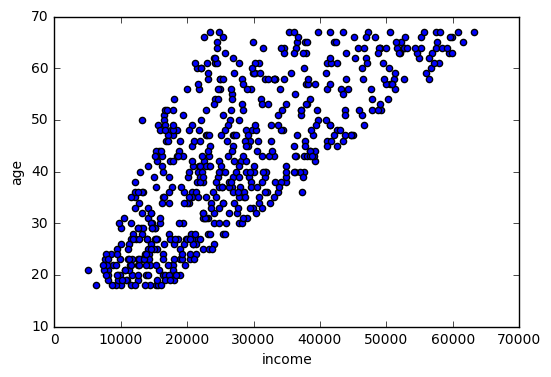

In [34]:
bank_new = pd.read_csv('bank_data.csv', sep=',')
bank_new.plot(x="income", y="age", kind="scatter")

In [35]:
'''These variables appear very correlated, just as we saw in the original correlation matrix.'''

'These variables appear very correlated, just as we saw in the original correlation matrix.'

In [36]:
'''9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).'''

'9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).'

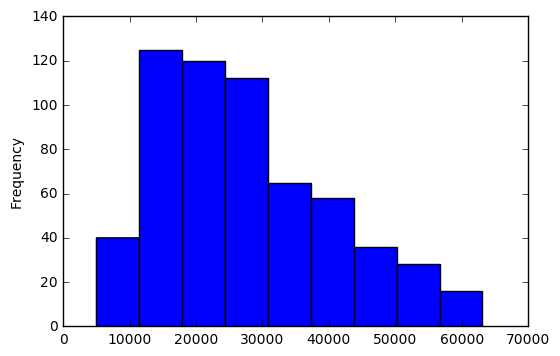

In [37]:
bank_new["income"].plot(kind="hist", bins=9)

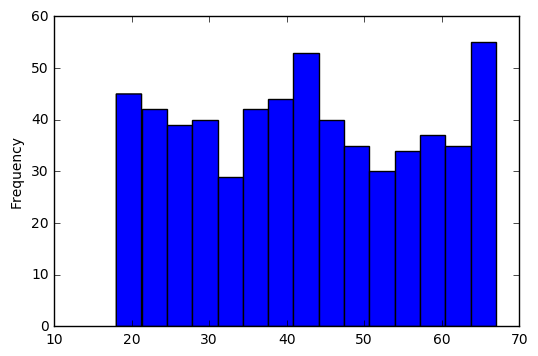

In [38]:
bank_new["age"].plot(kind="hist", bins=15)

In [39]:
'''10. Using a bargraph, plot the distribution of the values of the region attribute.'''

'10. Using a bargraph, plot the distribution of the values of the region attribute.'

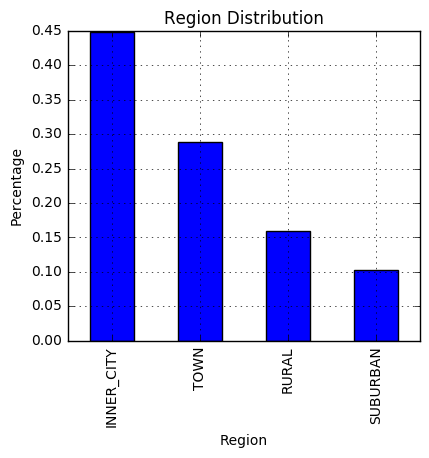

In [40]:
temp1 = bank_new["region"].value_counts()/bank_new["region"].count()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Region')
ax1.set_ylabel('Percentage')
ax1.set_title("Region Distribution")
temp1.plot(kind='bar', grid = True)

In [41]:
'''11. Perform a cross-tabulation of the region attribute with the pep attribute. 
This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute.
Show the results as a 4 by 2 (region x pep) table with entries representing the counts. 
[Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] 
Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the 
relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]'''

'11. Perform a cross-tabulation of the region attribute with the pep attribute. \nThis requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute.\nShow the results as a 4 by 2 (region x pep) table with entries representing the counts. \n[Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] \nThen, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the \nrelationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]'

In [42]:
gg = pd.crosstab(bank_new["region"], bank_new["pep"])
gg

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


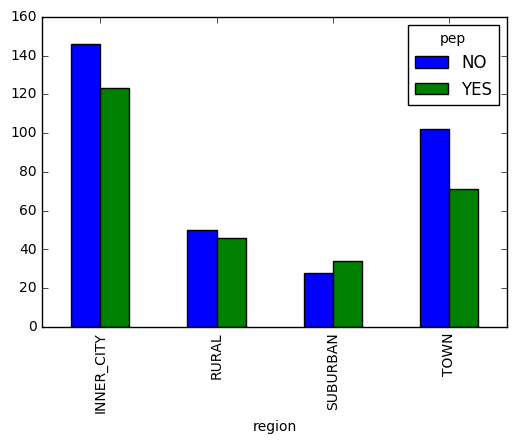

In [43]:
plt.show(gg.plot(kind="bar"))